In [121]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas
from functions import getbinary
from sklearn.utils import shuffle

In [122]:
X,Y =getbinary() #we extract binary data from the complete dataset using the function getbinary 

We will now calculate the total amount of data sets we have for calss 1 and class 0 

In [123]:
Y=Y.reshape(Y.shape[0],1)
count1 = np.count_nonzero(Y)
count1 # This means we have only 547 samples of class 1 and 4953 samples of class 0 

547

This creates a class imbalance problem and we have to address that by repeating the copies of the class 1 data set atleast 9 folds of the current dataset  

In [124]:
#Solving class imbalance 
X_class1 =[]
for i in range(0,Y.shape[0]):
    temp = Y[i]
    if temp==1:
        X_class1.append(X[i,:])

    
X_class1=np.repeat(X_class1,8,axis=0) # Repeats ndarray 8 times and stacks it vertically along rows 
#So we now are going to add 4376 additional elements in X matrix and subsequently we need to add similar elements in Y 

X = np.vstack((X,X_class1))
Y_class1 = np.ones((X_class1.shape[0],1))
Y = np.vstack([Y,Y_class1])

Y.shape

(9876, 1)

Now we have 4923 samples of class 1 and 4953 samples of class 0 , so we have sorted the class imbalance problem 
WE will now shuffle the data set and create a test set of 1000 data sets and rest will be train 

In [125]:
X,Y = shuffle(X,Y)
X_test,Y_test = X[-1000:,:],Y[-1000:,:]
X,Y=X[:-1000,:],Y[:-1000,:]
X.shape

(8876, 2304)

In [152]:
def sigmoid(Z):
    Z =np.exp(-Z)
    return 1/(1+Z)
def forward(X,W):
    out =sigmoid(X.dot(W))
    return out
def cross_entropy(T,Y):
    return -(T*np.log(Y)+(1-T)*np.log(1-Y)).sum()

In [127]:
bias = np.ones((X.shape[0],1))
X = np.hstack([bias,X])
X.shape

(8876, 2305)

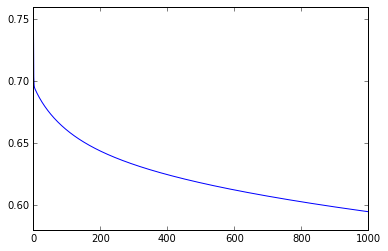

In [157]:
N,D = X.shape
W=(np.random.randn(D)/np.sqrt(D)).reshape(D,1)
#Running gradient descent now 
lr = 10e-7
reg = 0*10e-22
cost=[]
for i in range(0,1000):
    y_pred = forward(X,W)
    cost.append(cross_entropy(Y,y_pred))
    W = W-lr*(X.T.dot(y_pred-Y)+reg*W)

plt.plot(cost)
plt.show()
